In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [13]:
# To import the dataset:
file_path = "mushrooms.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [14]:
# Preparing data for training and test
# Target is 'class' column.
X = df.drop(["class",'veil-type'], axis=1)
y = df["class"]

X = pd.get_dummies(X)
X.head()

# Encode the target labels ('e' for edible and 'p' for poisonous)
y = LabelEncoder().fit_transform(y)

In [15]:
# Split data into separate training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=42
)

# Check the shape of X train and X test
print("\n")
print("train and test sample size", X_train.shape, X_test.shape)



train and test sample size (81, 116) (8043, 116)


In [16]:
# Artificial Neural Networks (ANN)
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

In [17]:
classifier.add(
    Dense(
        8, kernel_initializer="uniform", activation="relu", input_dim=X_train.shape[1]
    )
)
classifier.add(Dense(6, kernel_initializer="uniform", activation="relu"))
classifier.add(Dense(5, kernel_initializer="uniform", activation="relu"))
classifier.add(Dense(4, kernel_initializer="uniform", activation="relu"))
classifier.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 880us/step - loss: 0.6931 - accuracy: 0.4198
Epoch 2/100
9/9 [==============================] - 0s 843us/step - loss: 0.6926 - accuracy: 0.5926
Epoch 3/100
9/9 [==============================] - 0s 777us/step - loss: 0.6924 - accuracy: 0.5926
Epoch 4/100
9/9 [==============================] - 0s 804us/step - loss: 0.6921 - accuracy: 0.5926
Epoch 5/100
9/9 [==============================] - 0s 811us/step - loss: 0.6917 - accuracy: 0.5926
Epoch 6/100
9/9 [==============================] - 0s 883us/step - loss: 0.6914 - accuracy: 0.5926
Epoch 7/100
9/9 [==============================] - 0s 853us/step - loss: 0.6910 - accuracy: 0.5926
Epoch 8/100
9/9 [==============================] - 0s 796us/step - loss: 0.6906 - accuracy: 0.5926
Epoch 9/100
9/9 [==============================] - 0s 786us/step - loss: 0.6901 - accuracy: 0.5926
Epoch 10/100
9/9 [==============================] - 0s 718us/step - loss: 0.6897 - accuracy: 0.5926
Epoch 11/

In [19]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

252/252 [==============================] - 0s 353us/step


In [20]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("-----------------------\n")
print(cm)

-----------------------

[[4115   45]
 [ 384 3499]]


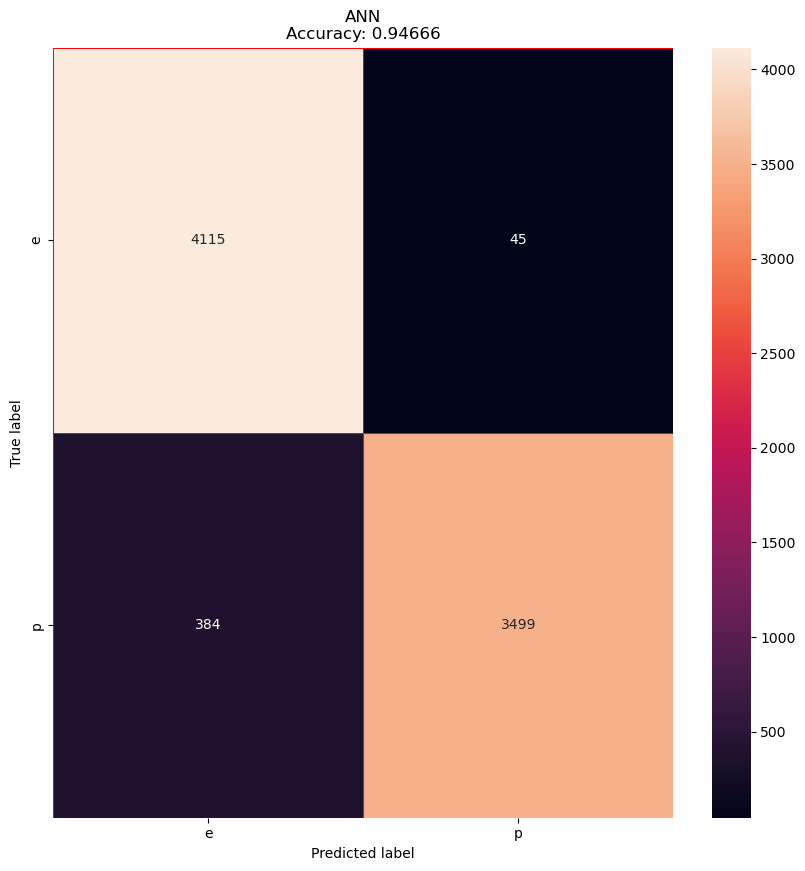

In [21]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index=["e", "p"], columns=["e", "p"])

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.title(f"ANN\nAccuracy: {accuracy_score(y_test, y_pred):.5f}")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

# Calculate the F1 score and store it in a different variable
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4160
           1       0.99      0.90      0.94      3883

    accuracy                           0.95      8043
   macro avg       0.95      0.95      0.95      8043
weighted avg       0.95      0.95      0.95      8043

F1 Score: 0.9422377810690723
